<a href="https://colab.research.google.com/github/rajat9070/DataScience_ML/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris= load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['Target']=iris.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
df.drop(['sepal length (cm)','sepal width (cm)','Target'],axis ='columns',inplace=True)

In [13]:
df.head()


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [14]:
from matplotlib import pyplot as plt

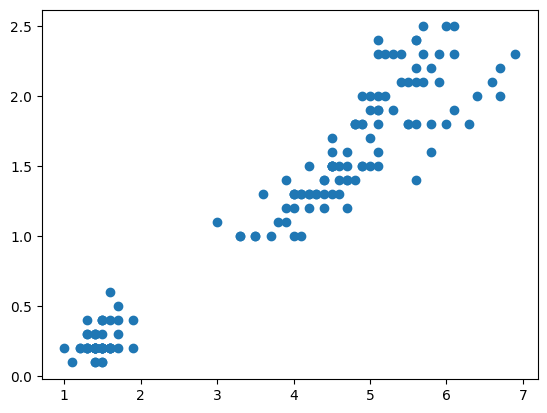

In [15]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [16]:
from sklearn.cluster import KMeans
k_rng= range(1,10)
sse=[]
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [17]:
sse

[550.8953333333334,
 86.39021984551397,
 31.37135897435897,
 19.47712336396547,
 13.916908757908757,
 11.051428739411808,
 9.212104827285607,
 7.621496965452849,
 6.576538396386222]

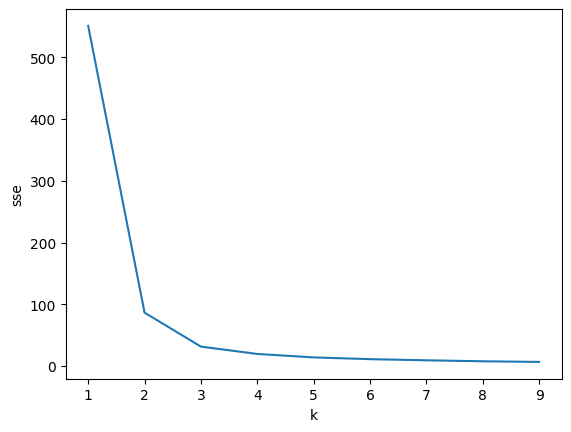

In [18]:
plt.xlabel("k")
plt.ylabel("sse")
plt.plot(k_rng,sse)

In [20]:
kms= KMeans(n_clusters=3)
ypred=kms.fit_predict(df[['petal length (cm)','petal width (cm)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
df['cluster']=ypred
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [23]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

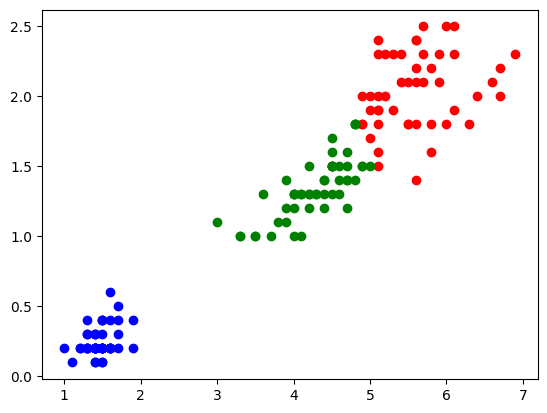

In [25]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="Red")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="Blue")
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color="Green")